In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

import pathlib

In [13]:
sys.path.append('..')

In [14]:
dataset_path = pathlib.Path('/home/alalbiol/Data/mamo/CBIS-DDSM-segmentation-2240x1792')


bounding_boxes_path = dataset_path / 'bounding_boxes.csv'

bounding_boxes = pd.read_csv(bounding_boxes_path)

images_path = dataset_path / 'images'
masks_path = dataset_path / 'masks'

images = list(images_path.glob('*.png'))

get_mask = lambda x: masks_path / x.name


print("Number of images: ", len(images))


Number of images:  2772


id          P_00486_RIGHT_MLO
x                         818
y                        1039
w                         588
h                         568
label    CALCIFICATION_BENIGN
Name: 20, dtype: object
5
int32
Counter({0: 3817345, 1: 196735})


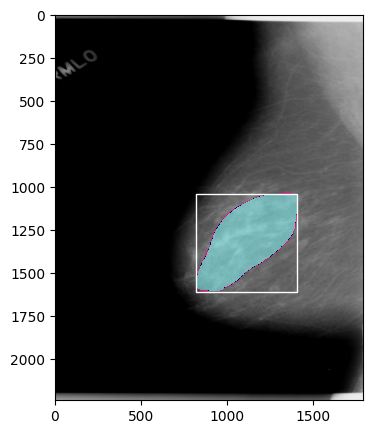

In [74]:
from matplotlib.colors import ListedColormap

from collections import Counter



k = 20

bb = bounding_boxes.iloc[k]
print(bb)

#label_to_color = {'MASS_BENING': 1, 'MASS_MALIGNANT': 2, 'CALCIFICATION_BENING': 3, 'CALCIFICATION_MALIGNANT': 4}

colors1 = [
    (1, 0, 0, 0),    # Transparent for label 0
    (1, 0, 0.5),  # Bright green with alpha
    (1, 0, 0.5),  # Dark green with alpha
    (0, 0, 0.5),  # Bright red with alpha
    (0.5, 1, 1, 0.5)  # Dark red with alpha
]

print(len(colors1))
cmap = ListedColormap(colors1)


def plot_image(image_path, mask_path, bb):
    image = plt.imread(image_path)
    mask = Image.open(mask_path)
    mask = np.array(mask).astype(np.int32) -1
    mask = np.maximum(mask, 0)
    
    print(mask.dtype)
    
    print(Counter(mask.flatten()))
    
    
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.imshow(image, cmap='gray')
    ax.imshow(mask, cmap=cmap)
    ax.add_patch(plt.Rectangle((bb['x'], bb['y']), bb['w'], bb['h'], edgecolor='w', facecolor='none'))
    plt.show()


image_path = dataset_path / 'images' / (bb['id'] + '.png')
mask_path = dataset_path / 'masks' / (bb['id'] + '.png')

plot_image(image_path, mask_path, bb)


In [75]:
from data.cbis_dataset import CBISSegmentationPatchDataset

/home/alalbiol/anaconda3/envs/Mammo/lib/python3.11/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [115]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

dataset_root = "/home/alalbiol/Data/mamo/CBIS-DDSM-segmentation"

    # Transforms
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    ToTensorV2()
])

# Dataset
dataset = CBISSegmentationPatchDataset(dataset_root, transform=transform, crop_size= 1024)

# Example access
img, mask = dataset[100]
print(f"Image shape: {img.shape}, Mask shape: {mask.shape}")
print(f"Image type: {img.dtype}, Mask type: {mask.dtype}")
print(f"image max: {img.max()}, mask max: {mask.max()}")


Image shape: torch.Size([1, 1024, 1024]), Mask shape: torch.Size([1024, 1024])
Image type: torch.float32, Mask type: torch.uint8
image max: 0.9265735745429993, mask max: 2


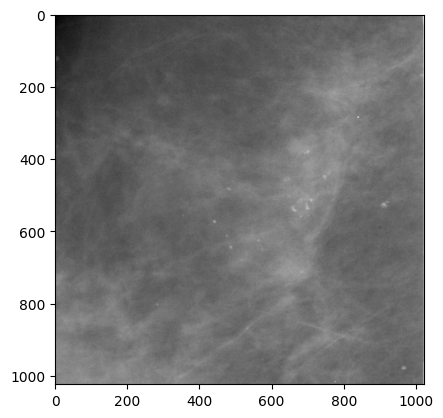

In [116]:
plt.imshow(img[0], cmap='gray')

In [117]:
def display_image_mask(image, mask):
    from matplotlib.colors import ListedColormap

    colors = [(0, 0, 0, 0), 'lime', 'green', 'red',  'blue', 'darkblue']
    cmap = ListedColormap(colors)

    # Overlay the mask on the grayscale image
    plt.figure(figsize=(8, 8))

    # Display the grayscale image
    plt.imshow(image, cmap='gray', interpolation='nearest')

    # Overlay the mask with transparency
    plt.imshow(mask, cmap=cmap, alpha=0.5, interpolation='nearest')

    # Add a colorbar for reference
    
    # Display the result
    plt.axis('off')
    plt.show()
    



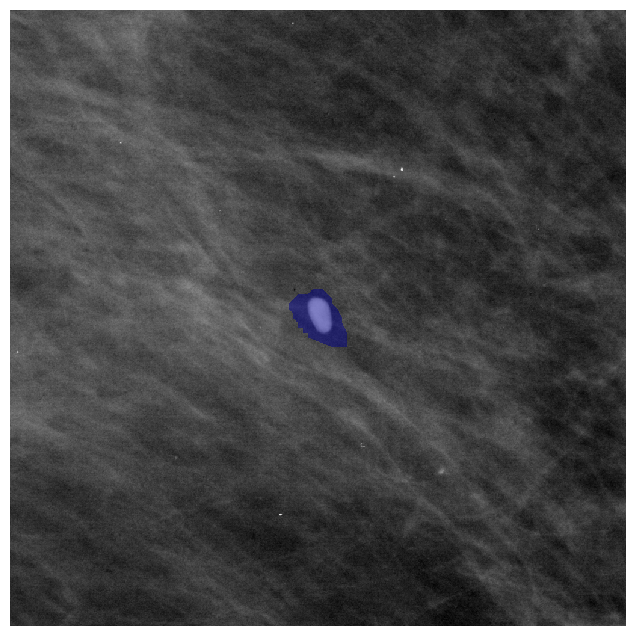

In [127]:
img, mask = dataset[1004]
display_image_mask(img[0], mask)

In [108]:
mask.max()

tensor(4, dtype=torch.uint8)